<a href="https://colab.research.google.com/github/Prestes01/Projeto-em-Python-An-lise-de-Cursos-no-Exterior/blob/main/CursosExterior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [375]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




*  CARREGAMENTO DE DADOS




In [376]:
df = pd.read_csv(r"/content/International_Education_Costs.csv")

In [377]:
df.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000



 * Países com mais oportunidades!






In [378]:
top_paises = df["Country"].value_counts().head(5)
top_paises

top_cursos = df["Program"].value_counts().head(5)
top_cursos


top_especializacoes= df["Level"].value_counts()
top_especializacoes

,count
Level,
Master,451
Bachelor,297
PhD,159


Grafíco de Barras

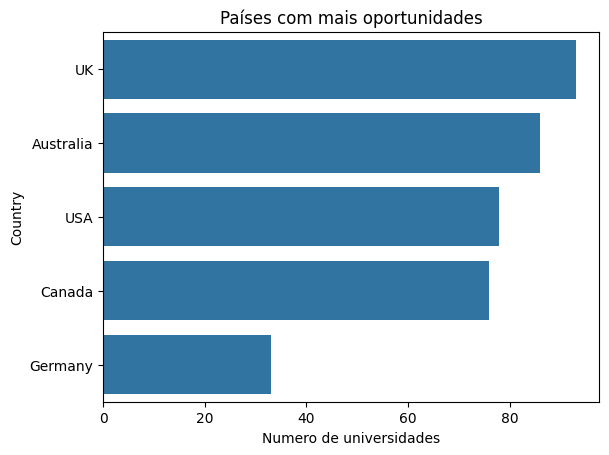

In [379]:
sns.barplot(y=top_paises.index, x=top_paises.values)
plt.title("Países com mais oportunidades")
plt.xlabel("Numero de universidades")
plt.show()

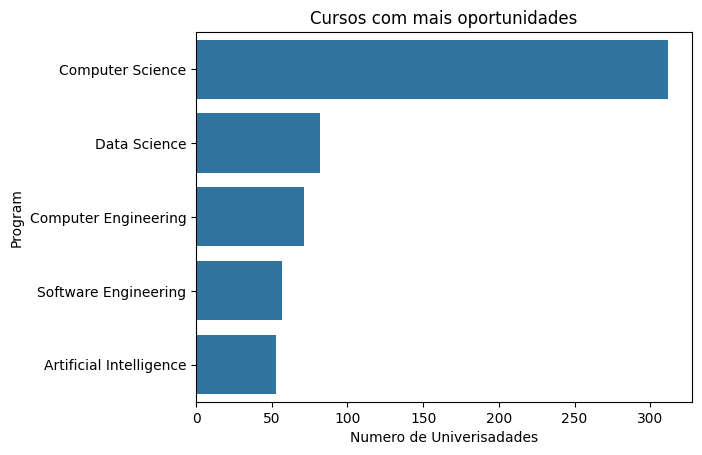

In [380]:
sns.barplot(x=top_cursos.values, y=top_cursos.index)
plt.title("Cursos com mais oportunidades")
plt.xlabel("Numero de Univerisadades")
plt.show()


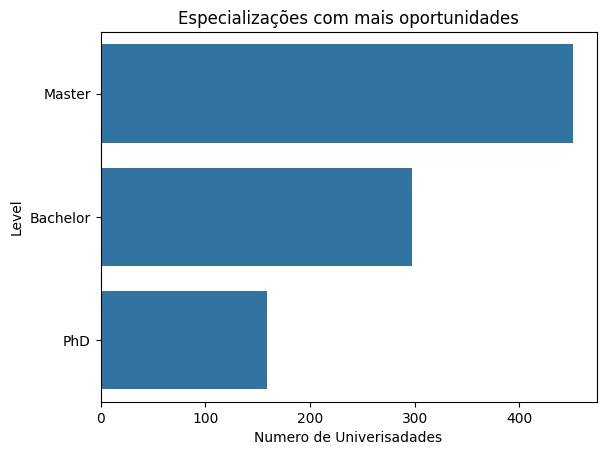

In [381]:
sns.barplot(y=top_especializacoes.index, x=top_especializacoes.values)
plt.title("Especializações com mais oportunidades")
plt.xlabel("Numero de Univerisadades")
plt.show()




*   MELHORES EM CUSTO BENEFÍCIO




In [382]:
df.head(5)

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [383]:
custo_curso = df["Tuition_USD"]
custo_aluguel = df["Rent_USD"] * 12 * df["Duration_Years"]
custo_seguro = df["Insurance_USD"] * df["Duration_Years"]
custo_transaco = df["Visa_Fee_USD"]

df["Total_Cost_USD"] = custo_curso + custo_aluguel + custo_seguro + custo_transaco


<Axes: ylabel='Frequency'>

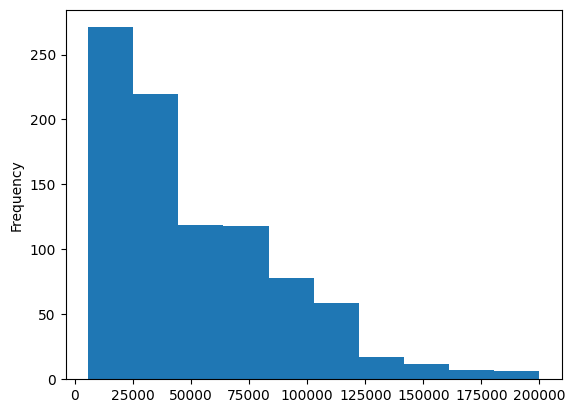

In [384]:
df['Total_Cost_USD'].plot(kind='hist')

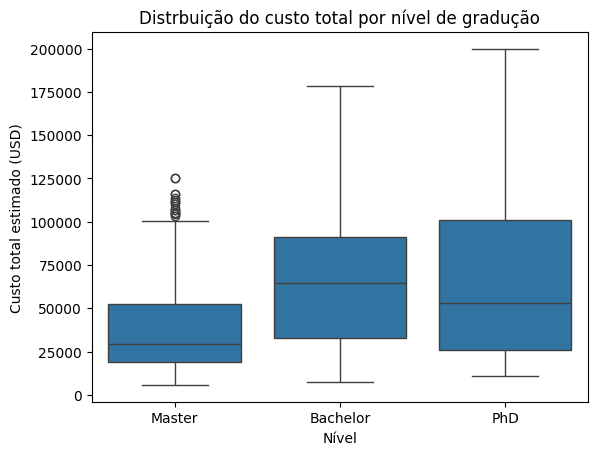

In [385]:
sns.boxplot(data=df, x="Level", y="Total_Cost_USD")
plt.title("Distrbuição do custo total por nível de gradução")
plt.xlabel("Nível")
plt.ylabel("Custo total estimado (USD)")
plt.show()

In [386]:
df.head(3)

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Total_Cost_USD
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00,111360.0
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79,64085.0
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35,78935.0


In [387]:
top_custo_vida = df.groupby("Country")["Living_Cost_Index"].mean().sort_values(ascending=False).head(5)
top_custo_vida

,Living_Cost_Index
Country,
Switzerland,97.820000
Singapore,82.022222
Iceland,81.750000
Luxembourg,78.900000
Hong Kong,78.600000


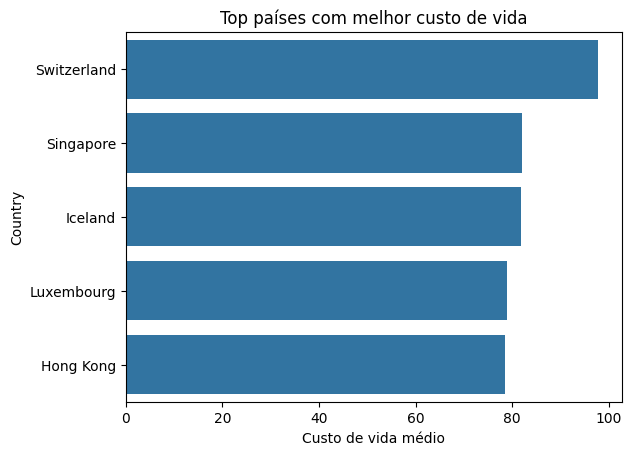

In [388]:
sns.barplot(y=top_custo_vida.index, x=top_custo_vida.values)
plt.title("Top países com melhor custo de vida")
plt.xlabel("Custo de vida médio")
plt.show()

In [389]:
df.head(3)

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Total_Cost_USD
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00,111360.0
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79,64085.0
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35,78935.0


In [390]:
df.sort_values(["Total_Cost_USD", "Living_Cost_Index"], ascending=True).head(5)

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Total_Cost_USD
755,Tunisia,Gabes,University of Gabes,Computer Engineering,Master,2.0,1400,30.5,160,60,200,3.15,5700.0
797,Algeria,Annaba,Badji Mokhtar University,Computer Engineering,Master,2.0,1000,34.5,180,80,200,137.50,5800.0
685,Egypt,Aswan,Aswan University,Data Analytics,Master,2.0,1900,27.8,160,100,200,30.90,6240.0
831,Bangladesh,Rajshahi,RUET,Software Engineering,Master,2.0,2000,37.2,170,100,200,109.50,6580.0
734,Tunisia,Sfax,University of Sfax,Artificial Intelligence,Master,2.0,1400,33.2,200,60,200,3.15,6660.0


In [391]:
top_paises

,count
Country,
UK,93
Australia,86
USA,78
Canada,76
Germany,33


In [392]:
paises = top_paises.index
program = "Data Science"
especializacao = "Master"



In [393]:
#definindo filtro

filtro_paises = df["Country"].isin(paises)
filtro_programa = df["Program"] == program
filtro_especializacao = df["Level"] == especializacao

df_filtrado = df[filtro_paises & filtro_programa & filtro_especializacao]
df_filtrado.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Total_Cost_USD
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79,64085.0
74,Australia,Hobart,University of Tasmania,Data Science,Master,2.0,30800,65.4,950,450,650,1.52,55350.0
98,USA,Boulder,University of Colorado,Data Science,Master,2.0,39800,71.5,1600,160,1500,1.00,81360.0
103,UK,Warwick,University of Warwick,Data Science,Master,1.0,36800,67.2,1000,485,800,0.79,50085.0
113,Canada,Halifax,Dalhousie University,Data Science,Master,2.0,28500,64.5,1200,235,900,1.35,59335.0


In [394]:
#Melhores custo benefícios
df_filtrado.sort_values(["Total_Cost_USD", "Living_Cost_Index"]).head(5)
df_filtrado.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Total_Cost_USD
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79,64085.0
74,Australia,Hobart,University of Tasmania,Data Science,Master,2.0,30800,65.4,950,450,650,1.52,55350.0
98,USA,Boulder,University of Colorado,Data Science,Master,2.0,39800,71.5,1600,160,1500,1.00,81360.0
103,UK,Warwick,University of Warwick,Data Science,Master,1.0,36800,67.2,1000,485,800,0.79,50085.0
113,Canada,Halifax,Dalhousie University,Data Science,Master,2.0,28500,64.5,1200,235,900,1.35,59335.0


In [395]:
#Piores custo benefícios
df_filtrado.sort_values(["Total_Cost_USD", "Living_Cost_Index"]).tail(5)


,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Total_Cost_USD
452,USA,Chicago,University of Chicago,Data Science,Master,2.0,58000,84.1,1900,160,1500,1.0,106760.0
447,USA,San Francisco,UC Berkeley Extension,Data Science,Master,2.0,52000,95.2,2400,160,1500,1.0,112760.0
898,USA,San Francisco,Stanford University,Data Science,Master,2.0,55000,95.2,2400,160,1500,1.0,115760.0
131,USA,New York,Columbia University,Data Science,Master,2.0,52800,100.0,2500,160,1500,1.0,115960.0
877,USA,New York,Columbia University,Data Science,Master,2.0,62000,100.0,2500,160,1500,1.0,125160.0
